In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from IPython.display import Image

# What does 'image' term mean?
Image can be understood as 2D function F(x,y), where x,y are spatial coordinates and amplitude of F at a particular value of x,y (so the value of function F) is known as the intensity of an image at that point. If these values are finite, then we can talk about digital images.

First of all, if you coming to the 'digital image processing techniques world', you need to start thinking about 2D images, as about 2D matrix. The basic unit of a 2D image is a pixel, which contains information about the intensity and color of the image, at that specific point. We can construct a 3D volume as a series of 2D images (planes). For a 3D image, this smallest element is named a voxel. 

In other words, a 2D image is a 2D array of pixels, arranged in columns and rows. The number of columns and rows determines image size, respectively width, and height. 
In the case of a 3D image, it is about a 3D array arranged in columns, rows, and tubes (width, height, and depth).

There are various types of images:
- grayscale image - the pixel/voxel consists only of 1 layer (channel), contaning shades of gray (in the range from black to white - from the darkest to the brightest)
- RGB image - the pixel/voxel consists of 3 layers (channels), each one for one color component: R (red),  G (green), and B (blue).

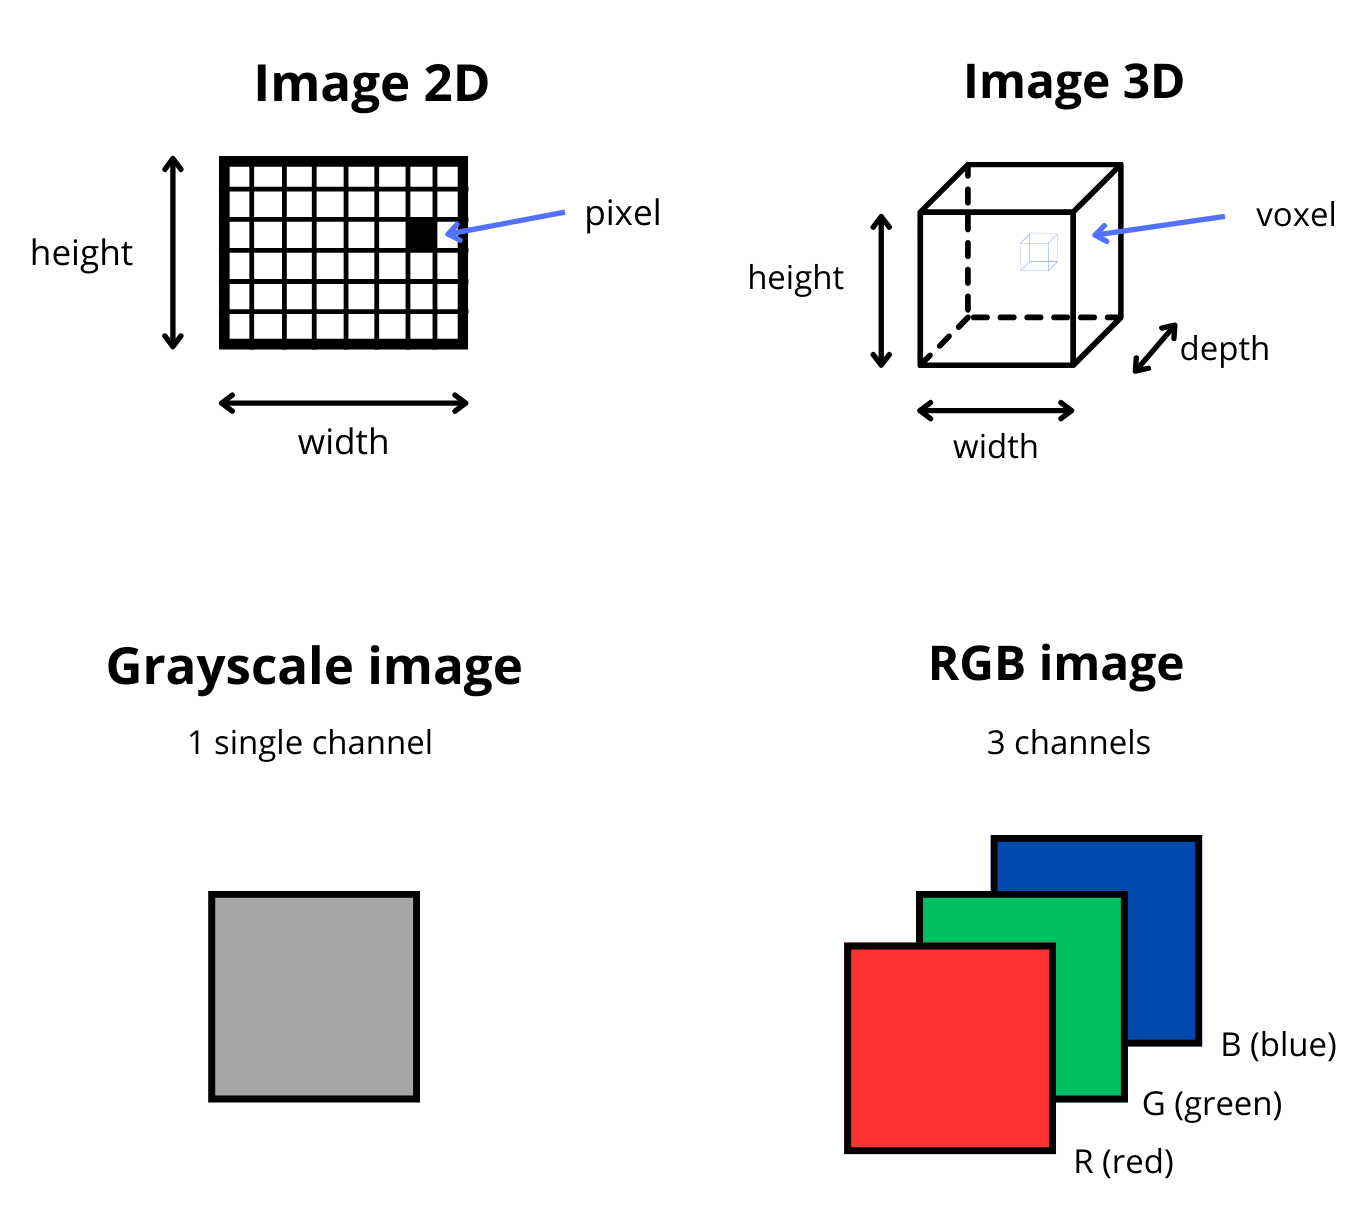

In [11]:
Image(filename="./images/1_1.png")

Image shape: (512, 380)
Image type: uint8
Minimum value 2 and maximum value 220


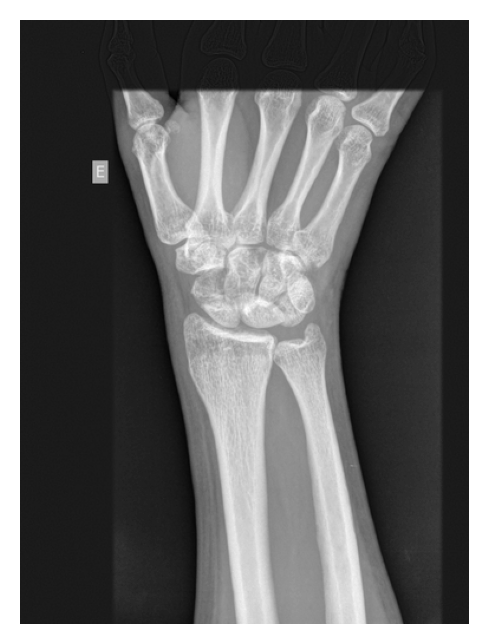

In [16]:
image = io.imread("images/example1.png")

print(f"Image shape: {image.shape}")
print(f"Image type: {image.dtype}")
print(f"Minimum value {np.min(image)} and maximum value {np.max(image)}")

plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Data normalization vs standarization
The purpose of these two methods is helping to remove the impact of scale and put all features on the same scale.

Normalization is a process of changing the range of pixel intesity values, to range [0, 1]. This is a significant step in data preprocessing before DL model training or distance based algorithms (like KNN), because they deal better with small floating point values. This also affects the speed of traning and the performance of the model (it is better).

Standardization is a data scaling technique that assumes that the distribution of the data is Gaussian and shifts the distribution of the data to have a mean of zero and a standard deviation of one. It is preferred for algorithms that are sensitive to feature scale or assume normality, such as Logistic Regression and Support Vector Machines. 

Normalized image shape: (512, 380)
Normalized image type: float64
Normalized image: minimum value 0.0 and maximum value 1.0
Standardized image shape: (512, 380)
Standardized image type: float64
Standardized image minimum value -1.1927951950400784 and maximum value 2.430781640743623


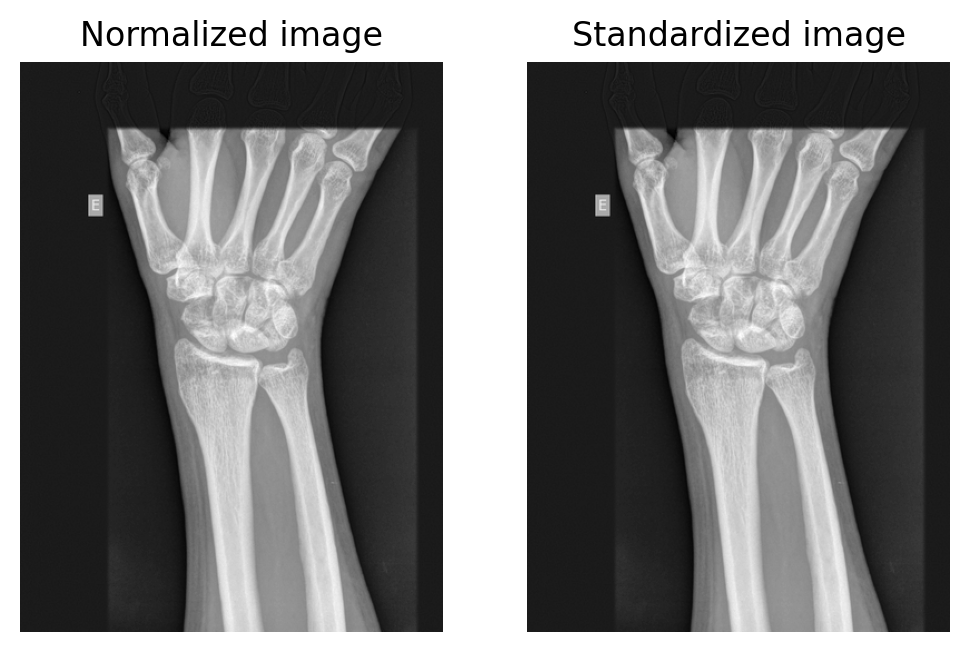

In [24]:
# As we previously checked, this image is currently in grayscale, so there is no need for conversion from RGB to gray. 
# Otherwise we would use a following function 
# image = color.rgb2gray(image)

normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) 
normalized_image = normalize(image)

mean = np.mean(image, keepdims=True)
std = np.std(image,  keepdims=True)
standardized_image = (image - mean) / std

print(f"Normalized image shape: {normalized_image.shape}")
print(f"Normalized image type: {normalized_image.dtype}")
print(f"Normalized image: minimum value {np.min(normalized_image)} and maximum value {np.max(normalized_image)}")

print(f"Standardized image shape: {standardized_image.shape}")
print(f"Standardized image type: {standardized_image.dtype}")
print(f"Standardized image minimum value {np.min(standardized_image)} and maximum value {np.max(standardized_image)}")

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(normalized_image, cmap='gray')
plt.title("Normalized image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(standardized_image, cmap='gray')
plt.title("Standardized image")
plt.axis('off')
plt.show()

# Create image (matrix) in Python 

# Image anisotropy

# Sources
- https://neptune.ai/blog/image-processing-python
- https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/ 